In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('mydata_DA.csv') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)

df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          598 non-null    object 
 1   County         598 non-null    object 
 2   Street         598 non-null    object 
 3   City           598 non-null    object 
 4   Zipcode        598 non-null    int64  
 5   Price          598 non-null    float64
 6   WalkScore      598 non-null    int64  
 7   Bike_Score     598 non-null    float64
 8   Beds           598 non-null    float64
 9   Bath           598 non-null    float64
 10  Sqft           598 non-null    float64
 11  Property_Type  598 non-null    object 
 12  Year_Built     598 non-null    float64
 13  Status         598 non-null    object 
dtypes: float64(6), int64(2), object(6)
memory usage: 65.5+ KB


,State,County,Street,City,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status
0,Ca,Marin-County,6 issaquah dock,Sausalito,94965,1495000.0,67,83.0,2.0,2.0,1228.0,Mobile/manufactured home,1987.0,Active
1,Ca,Marin-County,712 tamarack dr s,San rafael,94903,1699000.0,38,27.0,5.0,3.0,2306.0,Single family residential,1963.0,Active
2,Ca,Marin-County,41 bonnie banks way,San rafael,94901,1995000.0,29,29.0,4.0,3.0,3500.0,Single family residential,1970.0,Active
3,Ca,Marin-County,510 midway blvd,Novato,94947,885000.0,21,16.0,3.0,2.0,1212.0,Single family residential,1955.0,Active
4,Ca,Marin-County,848 diablo ave #3,Novato,94947,618000.0,88,69.0,2.0,2.5,1270.0,Condo,2000.0,Active


In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Zipcode', 'Price', 'WalkScore', 'Bike_Score', 'Beds', 'Bath', 'Sqft',
       'Year_Built'],
      dtype='object')
Index(['State', 'County', 'Street', 'City', 'Property_Type', 'Status'], dtype='object')


In [7]:
# Drop the State and Street columns
df = df.drop(['State', 'Street' ], axis=1)

In [9]:
# summary statistics for numerical variables
summary = df.describe()
print(summary)

            Zipcode         Price   WalkScore  Bike_Score        Beds  \
count    598.000000  5.980000e+02  598.000000  598.000000  598.000000   
mean   94829.292642  1.454669e+06   42.734114   50.132107    3.172241   
std      315.175168  8.930653e+05   26.351087   26.321507    0.851896   
min    94022.000000  9.995000e+04    0.000000    0.000000    2.000000   
25%    94559.000000  7.992498e+05   21.000000   28.000000    3.000000   
50%    94945.000000  1.249500e+06   42.000000   56.000000    3.000000   
75%    95070.000000  1.903722e+06   65.000000   71.000000    4.000000   
max    95687.000000  4.600000e+06   92.000000  100.000000    5.000000   

             Bath         Sqft   Year_Built  
count  598.000000   598.000000   598.000000  
mean     2.339465  1836.852843  1975.914716  
std      0.716623   697.159137    26.654645  
min      1.000000   679.000000  1880.000000  
25%      2.000000  1320.500000  1958.000000  
50%      2.000000  1700.000000  1976.000000  
75%      2.875000  2

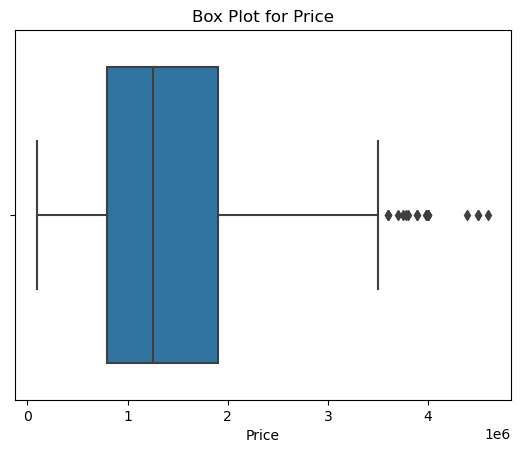

In [10]:

sns.boxplot(x=df['Price'])
plt.title('Box Plot for Price')
plt.show()

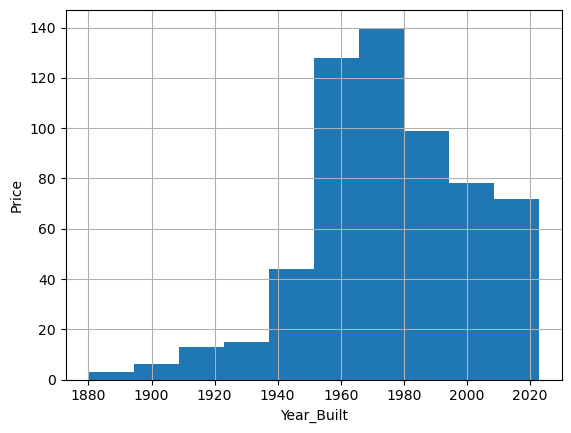

In [11]:
hist = df.Year_Built.hist()
hist.set_xlabel('Year_Built')
hist.set_ylabel('Price')

plt.show()

#boxplot comparing Price of houses & year built

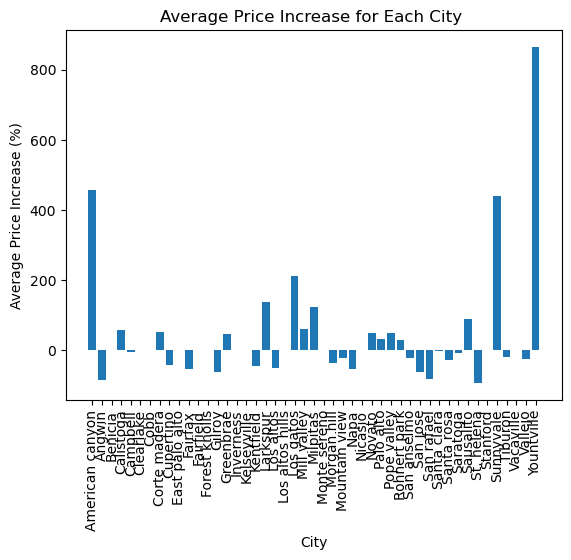

In [12]:
#the average price increase for each city  


# Calculation for price increase for each city
price_increase = df.groupby('City')['Price'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

plt.bar(price_increase.index, price_increase)
plt.xlabel('City')
plt.ylabel('Average Price Increase (%)')
plt.title('Average Price Increase for Each City ')
plt.xticks(rotation=90)
plt.show()


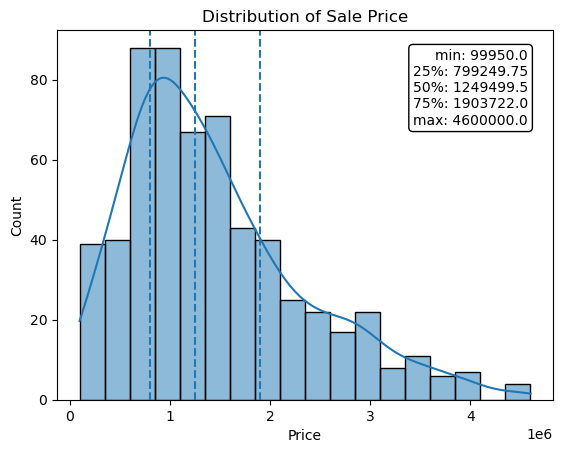

In [13]:
x = "Price"
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Sale Price')
variable = df[x].fillna(df[x].mean())
sns.histplot(variable, kde=True)
des = df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
plt.show()
#Distribution of price across the data

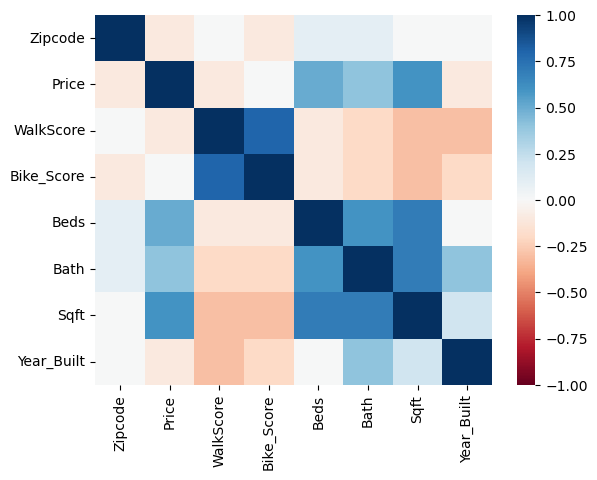

In [14]:
#Plotting correlation matrix to see how Price is correlated with other variables
cor = df.corr().round(1)
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

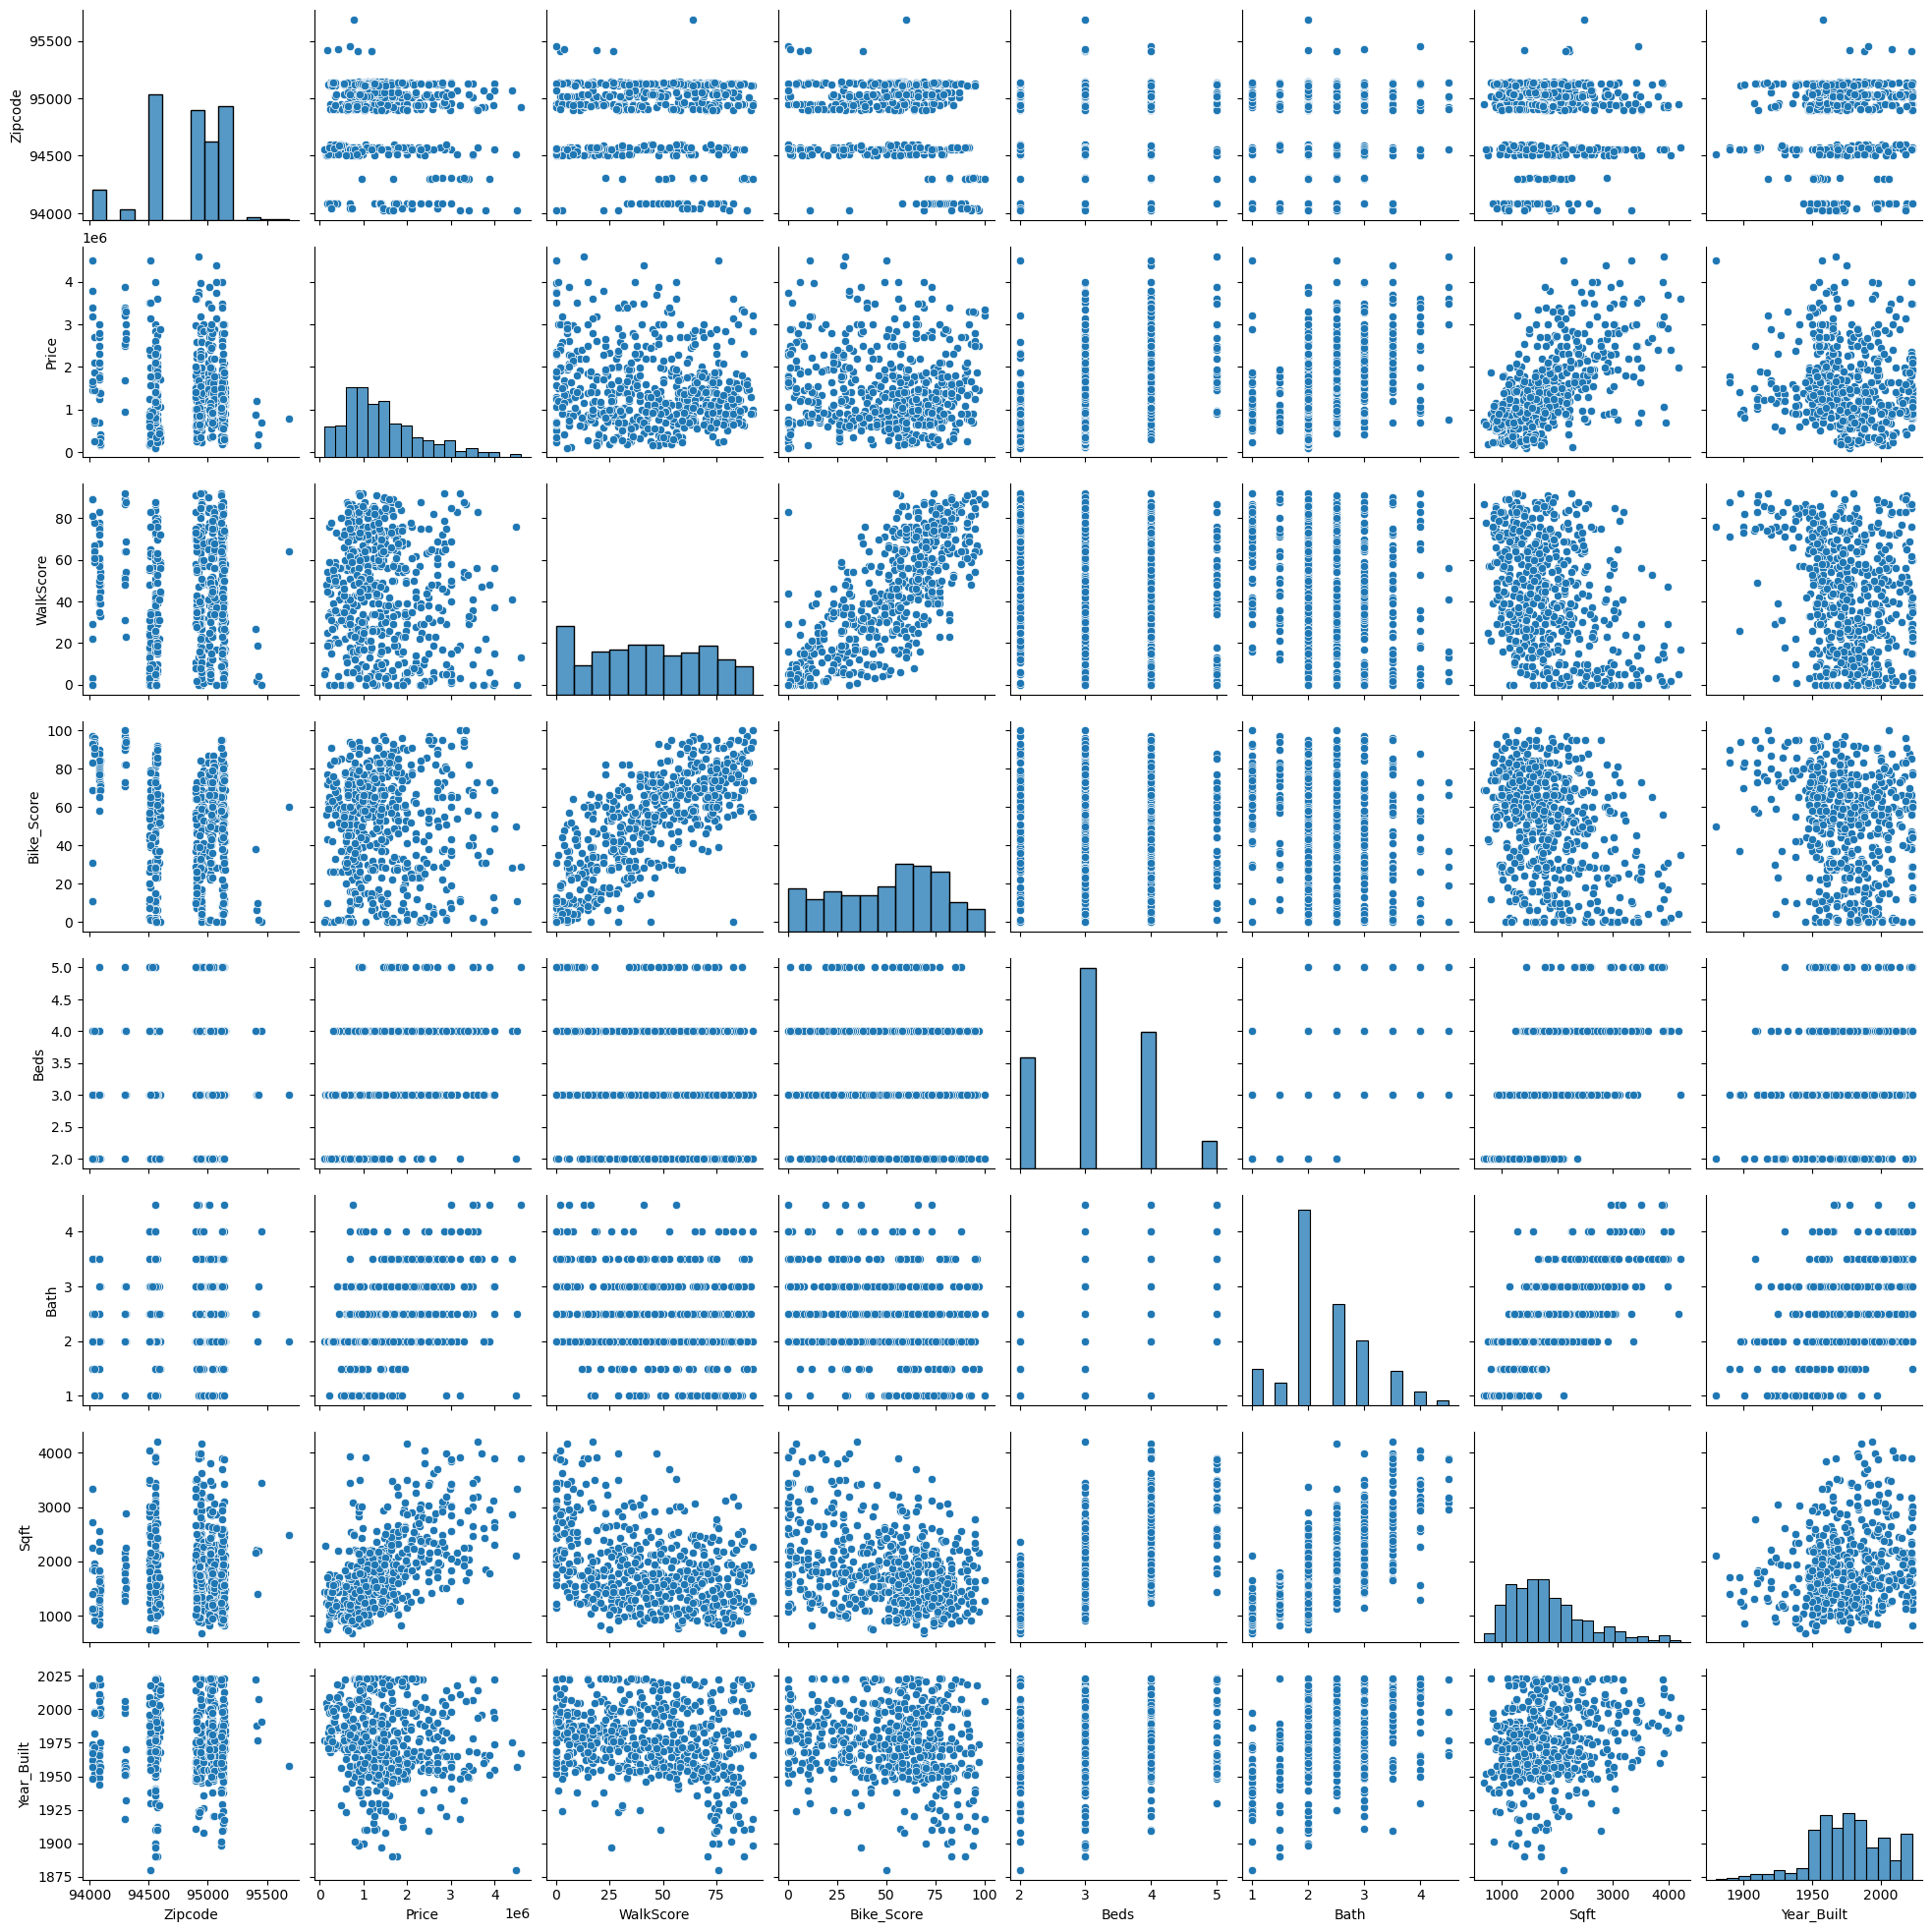

In [15]:
#Pairplot: It will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

%matplotlib inline

sns.pairplot(df)
plt.savefig('Pairwise comparison.png')
plt.show()

In [16]:
#Creating a column for Price per sqft
df['Avg.Price_per_sqft'] = (df['Price']/df['Sqft']).round(2)


In [17]:
#Average price_per_sqft for all the cities

cpsft_df = df.groupby(by="City")
cpsft_df = pd.DataFrame(cpsft_df['Avg.Price_per_sqft'].mean().round(2))
cpsft_df

,Avg.Price_per_sqft
City,
American canyon,278.09
Angwin,612.83
Benicia,465.82
Calistoga,786.37
Campbell,988.42
Clearlake,120.71
Cobb,190.45
Corte madera,953.64
Cupertino,1165.23


In [18]:
# Top 10 and Bottom 10 cities as per the Average price per square feet

Top10 = pd.DataFrame(cpsft_df.sort_values(by = 'Avg.Price_per_sqft',ascending=False).head(10))
print(Top10)
Top10['Stack'] = 'Top10'

Bottom10 = pd.DataFrame(cpsft_df.sort_values(by = 'Avg.Price_per_sqft',ascending=False).tail(10))
print(Bottom10)
Bottom10['Stack'] = 'Bottom10'

                 Avg.Price_per_sqft
City                               
Palo alto                   1728.21
Monte sereno                1643.84
Saratoga                    1558.74
Los altos                   1448.83
Los altos hills             1349.73
Inverness                   1275.26
Tiburon                     1218.49
Cupertino                   1165.23
Los gatos                   1083.13
Sausalito                   1002.84
                 Avg.Price_per_sqft
City                               
Benicia                      465.82
Rohnert park                 408.74
Vallejo                      358.88
Fairfield                    316.14
Vacaville                    311.87
American canyon              278.09
Kelseyville                  202.75
Cobb                         190.45
Pope valley                  172.54
Clearlake                    120.71


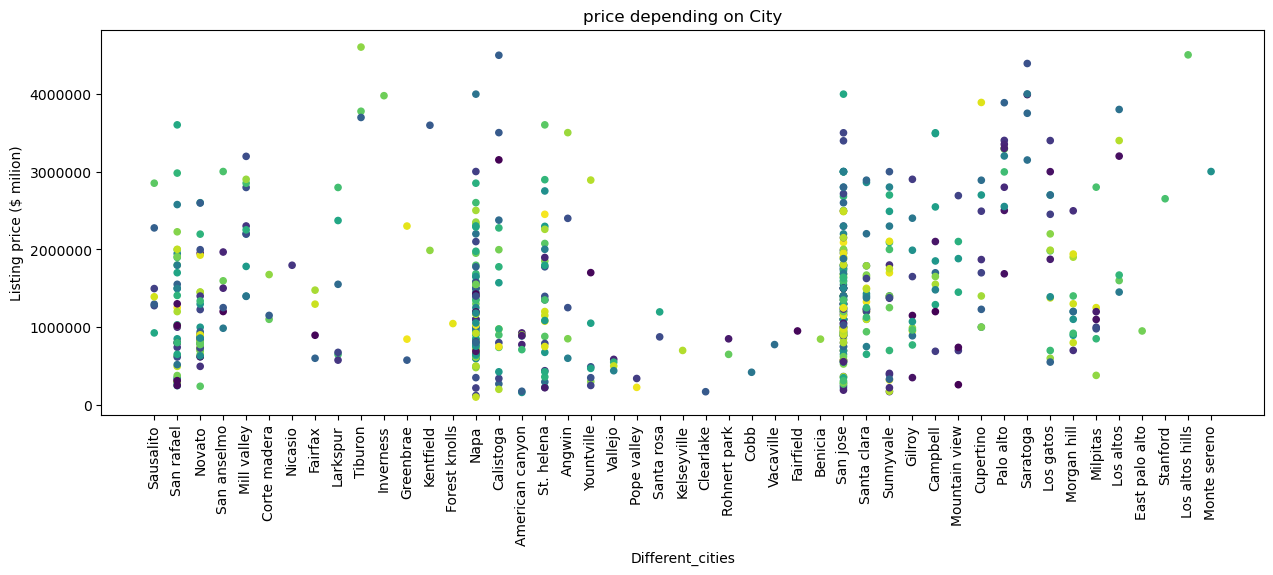

In [19]:
#prices against cities 
import numpy as np
plt.figure(figsize=(15,5))
colors = np.random.rand(len(df))
area = 20 
plt.scatter(df['City'],df['Price'] , s=area,c=colors, alpha=1)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Different_cities')
plt.ylabel('Listing price ($ milion)')
plt.title('price depending on City')
plt.xticks(rotation=90)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Sausalito'),
  Text(1, 0, 'San rafael'),
  Text(2, 0, 'Novato'),
  Text(3, 0, 'San anselmo'),
  Text(4, 0, 'Mill valley'),
  Text(5, 0, 'Corte madera'),
  Text(6, 0, 'Nicasio'),
  Text(7, 0, 'Fairfax'),
  Text(8, 0, 'Larkspur'),
  Text(9, 0, 'Tiburon'),
  Text(10, 0, 'Inverness'),
  Text(11, 0, 'Greenbrae'),
  Text(12, 0, 'Kentfield'),
  Text(13, 0, 'Forest knolls'),
  Text(14, 0, 'Napa'),
  Text(15, 0, 'Calistoga'),
  Text(16, 0, 'American canyon'),
  Text(17, 0, 'St. helena'),
  Text(18, 0, 'Angwin'),
  Text(19, 0, 'Yountville'),
  Text(20, 0, 'Vallejo'),
  Text(21, 0, 'Pope valley'),
  Text(22, 0, 'Santa rosa'),
  Text(23, 0, 'Kelseyville'),
  Text(24, 0, 'Clearlake'),
  Text(25, 0, 'Rohnert park'),
  Text(26, 0, 'Cobb'),
  Text(27, 0, 'Vacaville'),
  Text(28

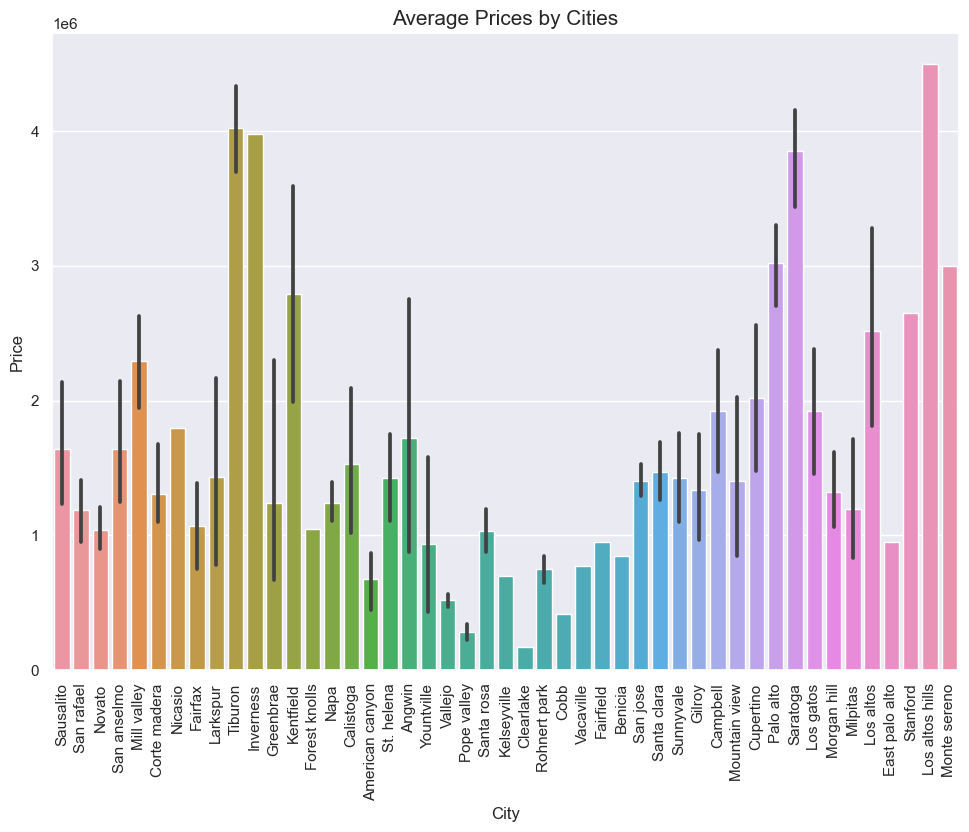

In [20]:
#how do the average prices vary across different cities 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='City',y='Price',data=df)
plt.title('Average Prices by Cities',fontsize=15)
plt.xticks(rotation=90)



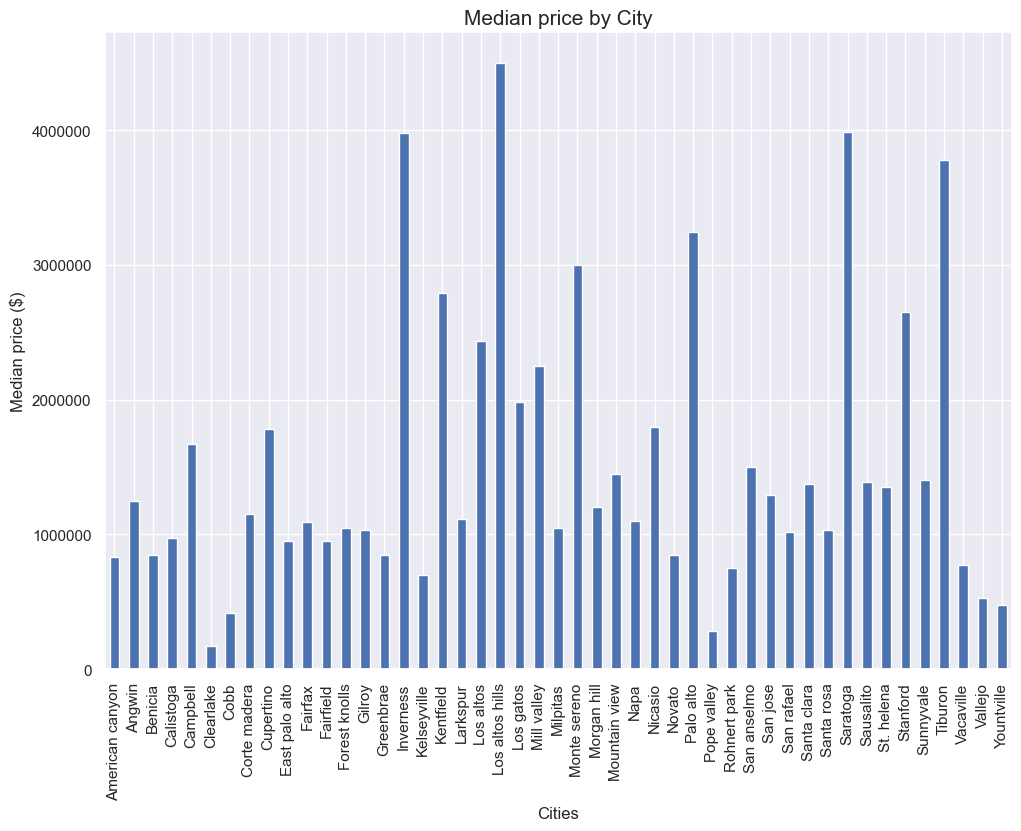

In [21]:
#Median Price of Home
#What cities have the highest median price

average_price_by_hometype = df.groupby(['City'])['Price'].median()
#bar chart presents the average price by hometype
average_price_by_hometype.plot.bar()
plt.ylabel('Median price ($)')
plt.xlabel('Cities')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Median price by City',fontsize=15)
plt.savefig('Median price by City')
plt.show()


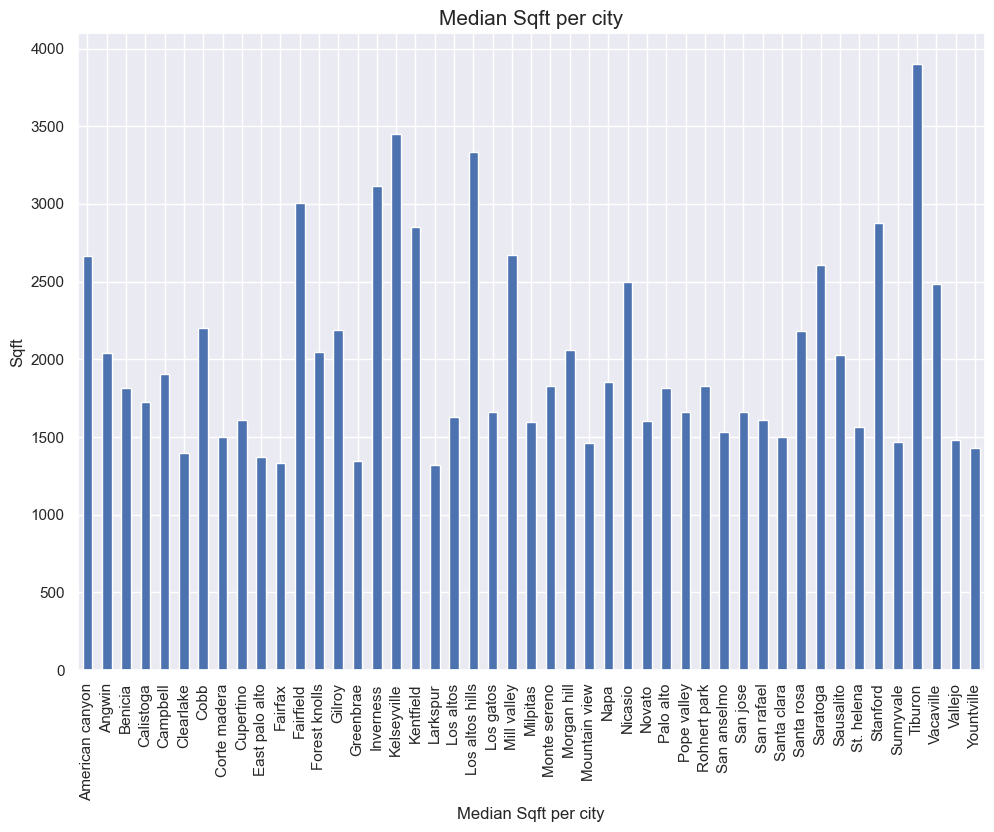

In [22]:
average_sqft_by_hometype = df.groupby(['City'])['Sqft'].median()
#bar chart presents the average price by hometype
average_sqft_by_hometype.plot.bar()
plt.ylabel('Sqft')
plt.xlabel('Median Sqft per city')
plt.title('Median Sqft per city',fontsize=15)

plt.show()

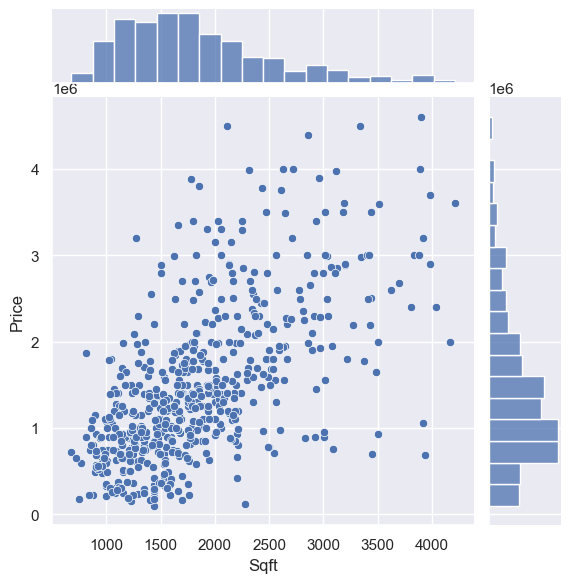

In [23]:
#How does the price per sqft for a house change with the size of the house?
%matplotlib inline
sns.jointplot(x='Sqft',y='Price',data=df,kind='scatter')
plt.savefig('Price & Sqft')
plt.show()

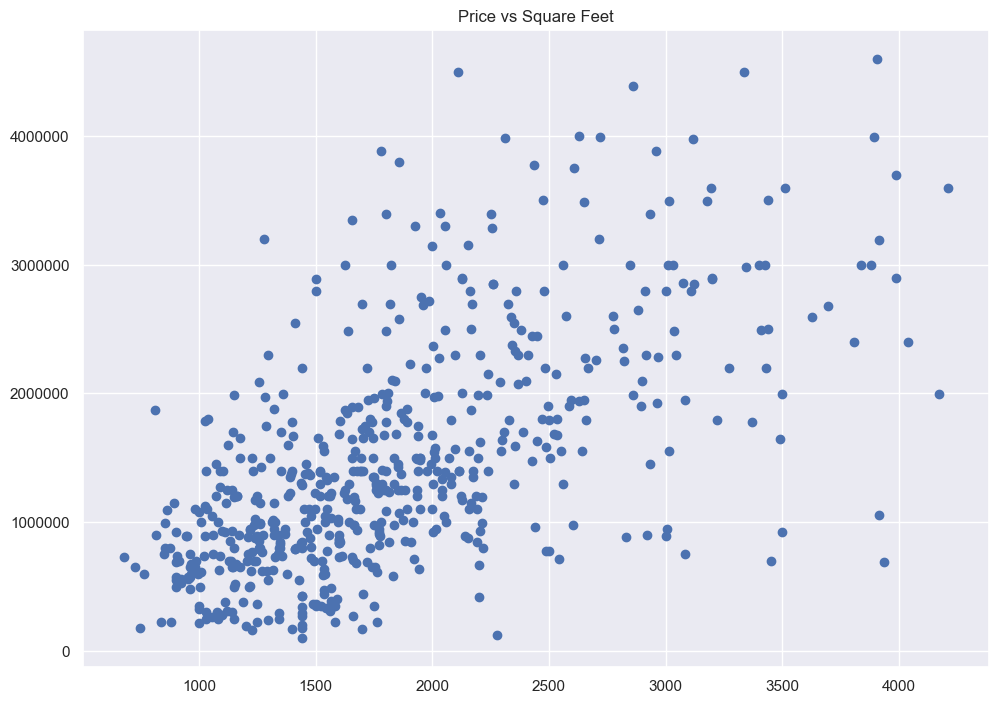

In [24]:
plt.scatter(df.Sqft,df.Price)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Price vs Square Feet")
plt.show()

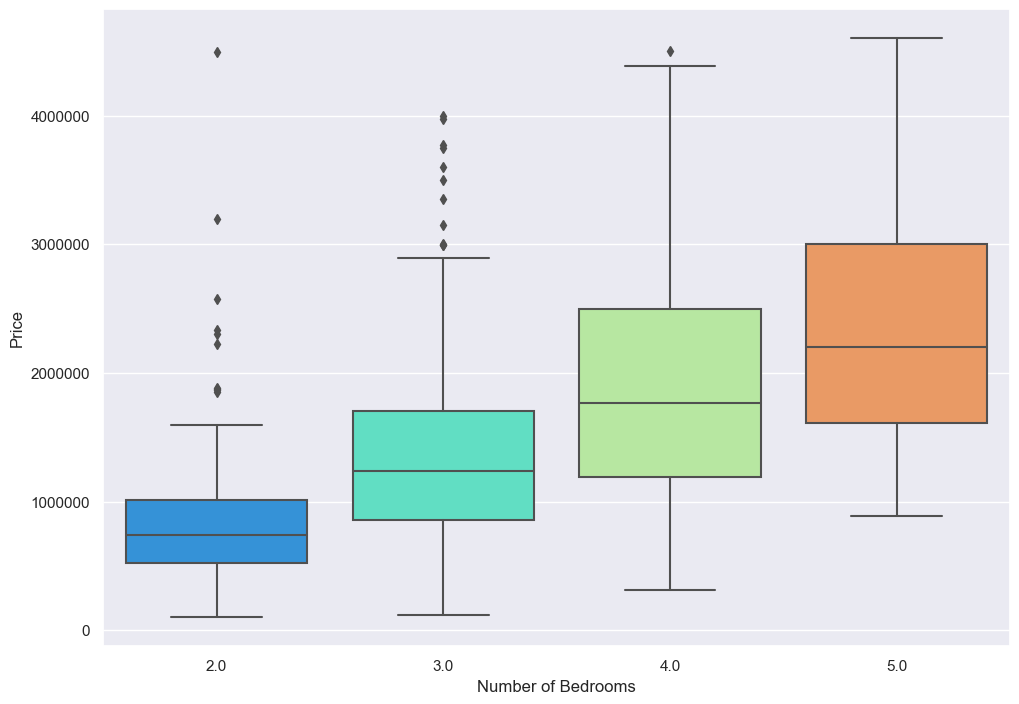

In [25]:
#Find the variation of house price by number of bedrooms
sns.boxplot(x='Beds',y='Price',data=df,palette='rainbow')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.savefig('Price & Beds')

Text(0.5, 1.0, 'Average Bath per Price')

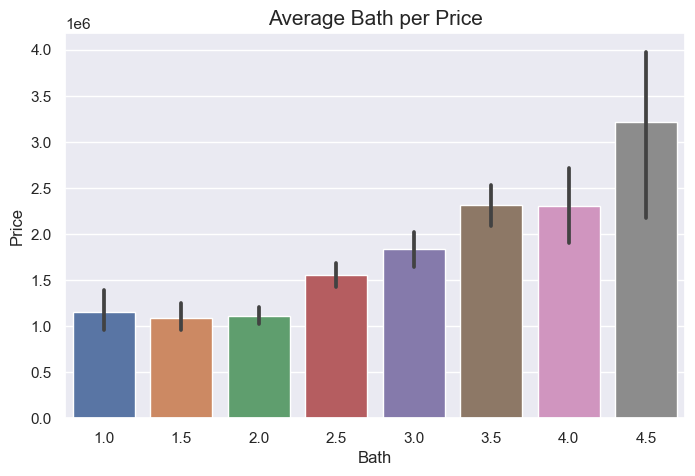

In [28]:
##Price & Bath
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Bath',y='Price',data=df)
plt.title('Average Bath per Price',fontsize=15)
#price increase/ allotment is unnatural is uneven

In [29]:
#Total properties according to no. of beds

data_beds_order= df.sort_values(by ='Beds')
prop_beds_df = data_beds_order['Beds'].value_counts() 
prop_beds_df

3.0    252
4.0    172
2.0    139
5.0     35
Name: Beds, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Sausalito'),
  Text(1, 0, 'San rafael'),
  Text(2, 0, 'Novato'),
  Text(3, 0, 'San anselmo'),
  Text(4, 0, 'Mill valley'),
  Text(5, 0, 'Corte madera'),
  Text(6, 0, 'Nicasio'),
  Text(7, 0, 'Fairfax'),
  Text(8, 0, 'Larkspur'),
  Text(9, 0, 'Tiburon'),
  Text(10, 0, 'Inverness'),
  Text(11, 0, 'Greenbrae'),
  Text(12, 0, 'Kentfield'),
  Text(13, 0, 'Forest knolls'),
  Text(14, 0, 'Napa'),
  Text(15, 0, 'Calistoga'),
  Text(16, 0, 'American canyon'),
  Text(17, 0, 'St. helena'),
  Text(18, 0, 'Angwin'),
  Text(19, 0, 'Yountville'),
  Text(20, 0, 'Vallejo'),
  Text(21, 0, 'Pope valley'),
  Text(22, 0, 'Santa rosa'),
  Text(23, 0, 'Kelseyville'),
  Text(24, 0, 'Clearlake'),
  Text(25, 0, 'Rohnert park'),
  Text(26, 0, 'Cobb'),
  Text(27, 0, 'Vacaville'),
  Text(28

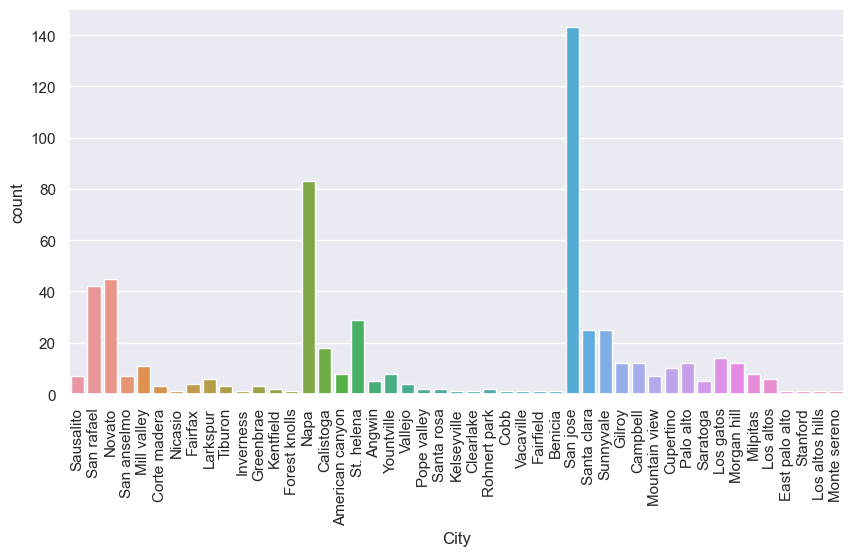

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='City',data=df)
plt.xticks(rotation=90)

In [31]:
#Average price of house with no. of bed in top 10 city

cross_tab = pd.crosstab(index=df['City'], columns=df['Beds'], values=df['Price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)


cross_tab.loc[['Palo alto','Monte sereno','Saratoga', 'Los altos', 'Los altos hills', 'Inverness', 'Tiburon', 'Cupertino', 'Los gatos', 'Sausalito'],[2,3,4,5]]

Beds,2.0,3.0,4.0,5.0
City,,,,
Palo alto,3200000,2645000,3097000,3885000
Monte sereno,0,2999999,0,0
Saratoga,0,3749000,3880972,0
Los altos,1524000,1668800,3464666,0
Los altos hills,0,0,4500000,0
Inverness,0,3975000,0,0
Tiburon,0,3775000,3695000,4600000
Cupertino,1273722,1548944,2692000,3888000
Los gatos,1056541,1739842,3031333,2450000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Palo alto'),
  Text(1, 0, 'Monte sereno'),
  Text(2, 0, 'Saratoga'),
  Text(3, 0, 'Los altos'),
  Text(4, 0, 'Los altos hills'),
  Text(5, 0, 'Inverness'),
  Text(6, 0, 'Tiburon'),
  Text(7, 0, 'Cupertino'),
  Text(8, 0, 'Los gatos'),
  Text(9, 0, 'Sausalito')])

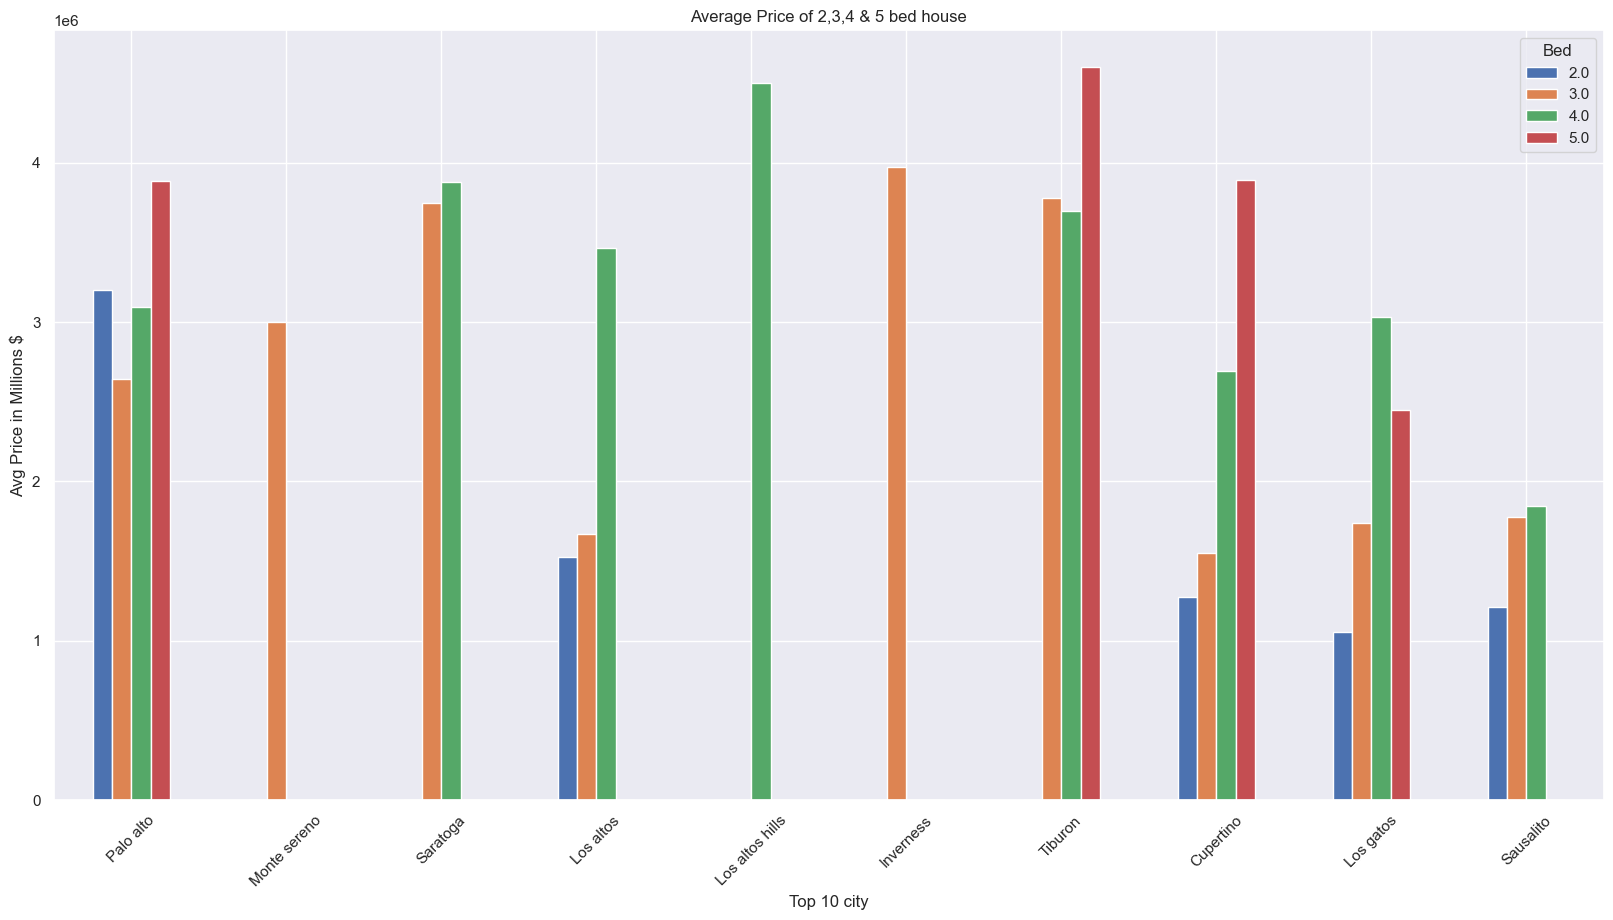

In [32]:
#Average prices of house per bed 

cross_tab.loc[['Palo alto','Monte sereno','Saratoga', 'Los altos', 'Los altos hills', 'Inverness', 'Tiburon', 'Cupertino', 'Los gatos', 'Sausalito'],[2,3,4,5]].plot.bar(figsize=(20,10))

plt.title('Average Price of 2,3,4 & 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.xlabel('Top 10 city')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

In [33]:
summary = df.describe()
print(summary)

            Zipcode         Price   WalkScore  Bike_Score        Beds  \
count    598.000000  5.980000e+02  598.000000  598.000000  598.000000   
mean   94829.292642  1.454669e+06   42.734114   50.132107    3.172241   
std      315.175168  8.930653e+05   26.351087   26.321507    0.851896   
min    94022.000000  9.995000e+04    0.000000    0.000000    2.000000   
25%    94559.000000  7.992498e+05   21.000000   28.000000    3.000000   
50%    94945.000000  1.249500e+06   42.000000   56.000000    3.000000   
75%    95070.000000  1.903722e+06   65.000000   71.000000    4.000000   
max    95687.000000  4.600000e+06   92.000000  100.000000    5.000000   

             Bath         Sqft   Year_Built  Avg.Price_per_sqft  
count  598.000000   598.000000   598.000000          598.000000  
mean     2.339465  1836.852843  1975.914716          787.137057  
std      0.716623   697.159137    26.654645          380.626796  
min      1.000000   679.000000  1880.000000           52.660000  
25%      2.0

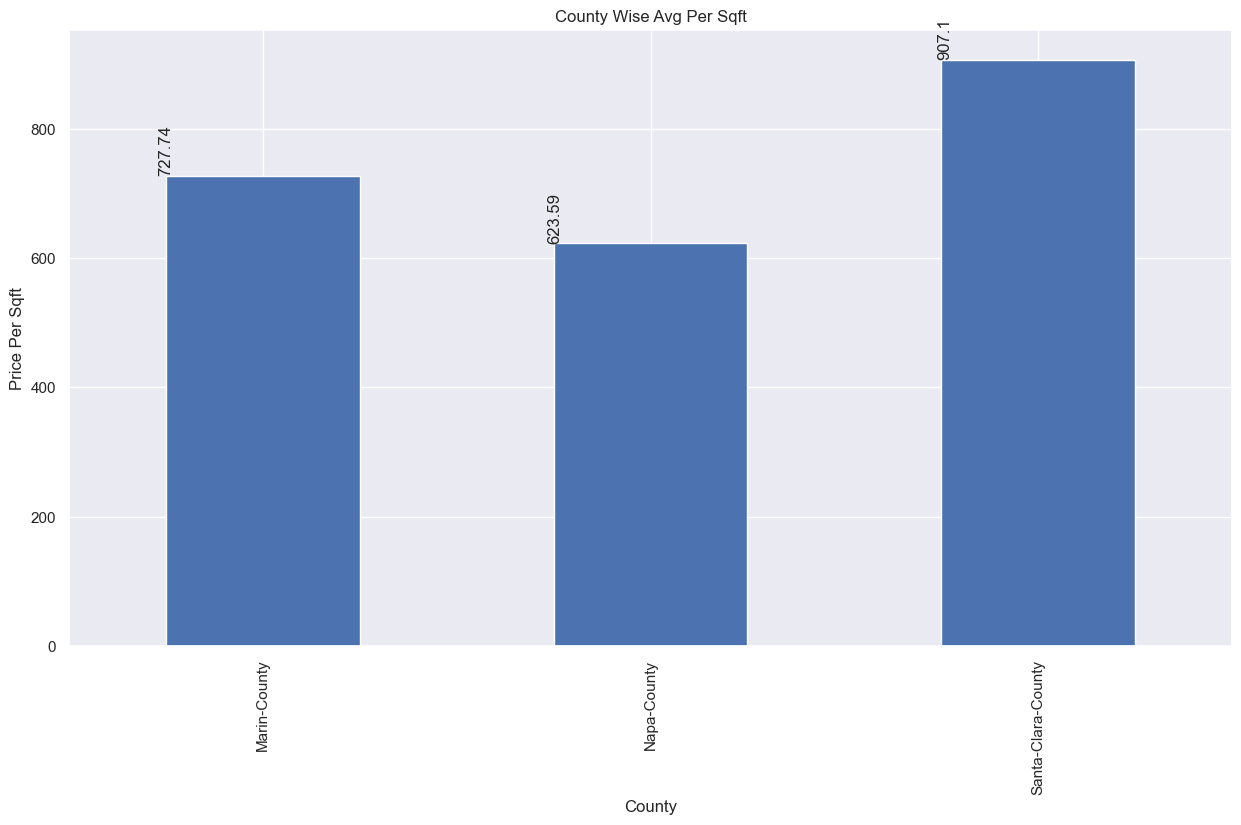

In [34]:
#Bar plot of county and average price per sqft
df_group = df.groupby(['County'])['Avg.Price_per_sqft'].mean().round(2)
ax = df_group.plot(kind='bar', figsize = (15,8))
plt.ylabel("Price Per Sqft")
plt.title('County Wise Avg Per Sqft')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), horizontalalignment='center', rotation='vertical')


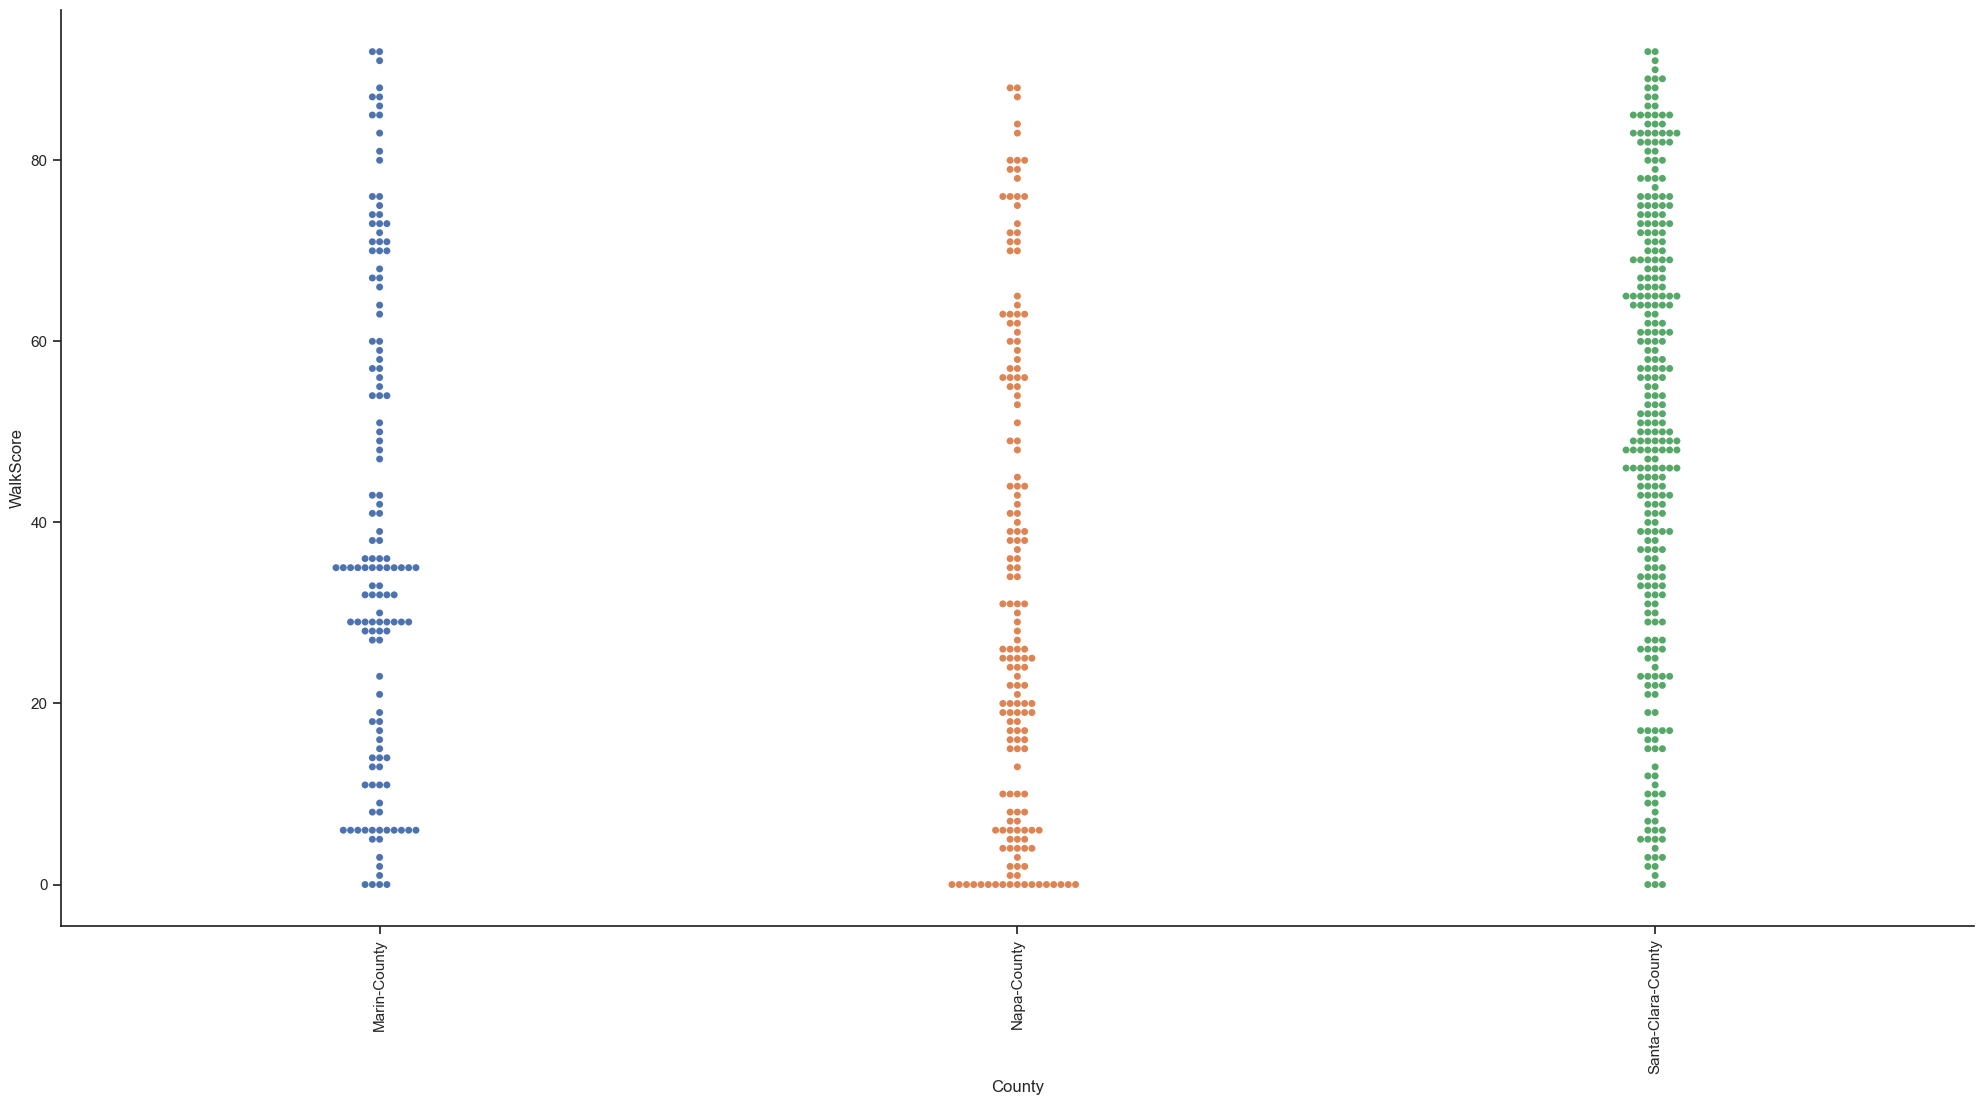

In [35]:
#Catplot of walkscore and bike score to check range of scores county wise
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
county_W_B_df = df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="WalkScore", data=county_W_B_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

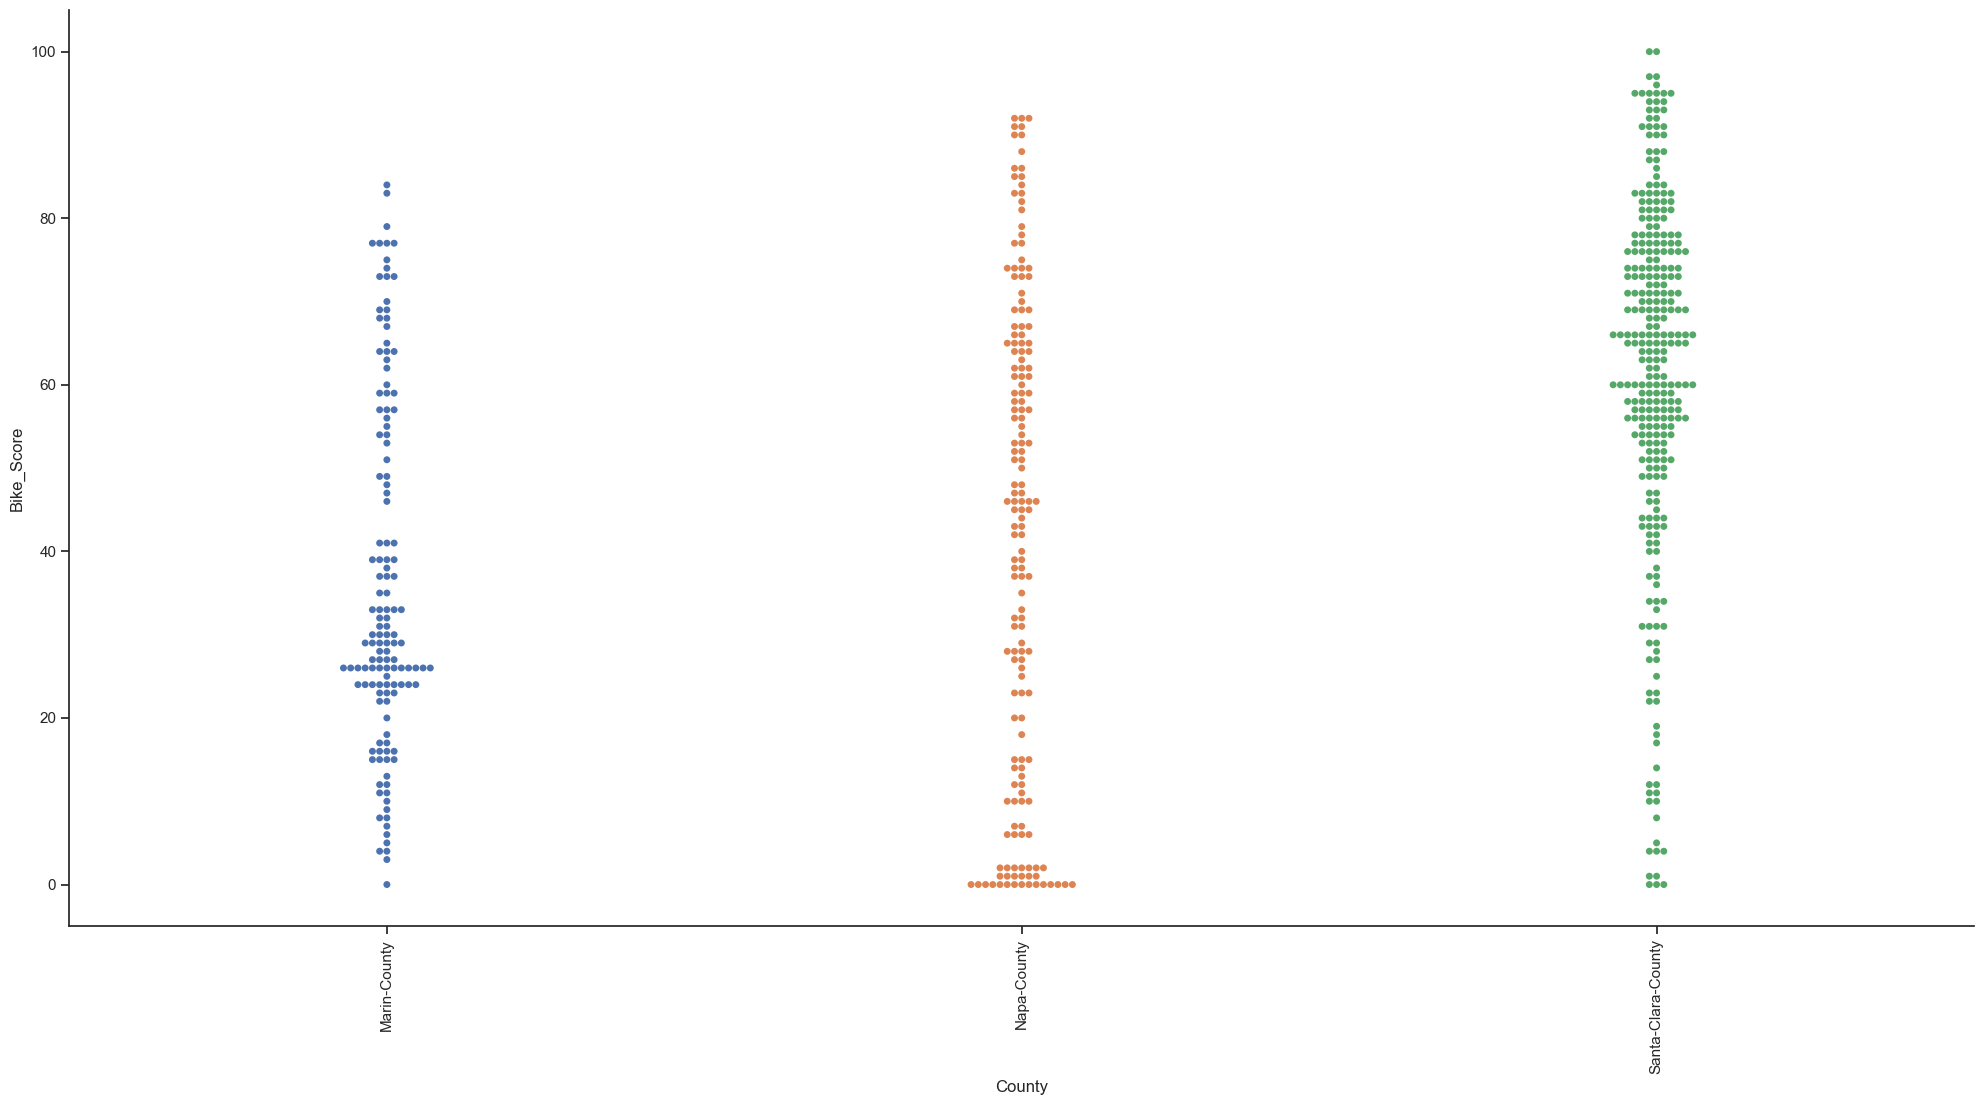

In [36]:
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="Bike_Score", data=county_W_B_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Napa-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'Santa-Clara-County')])

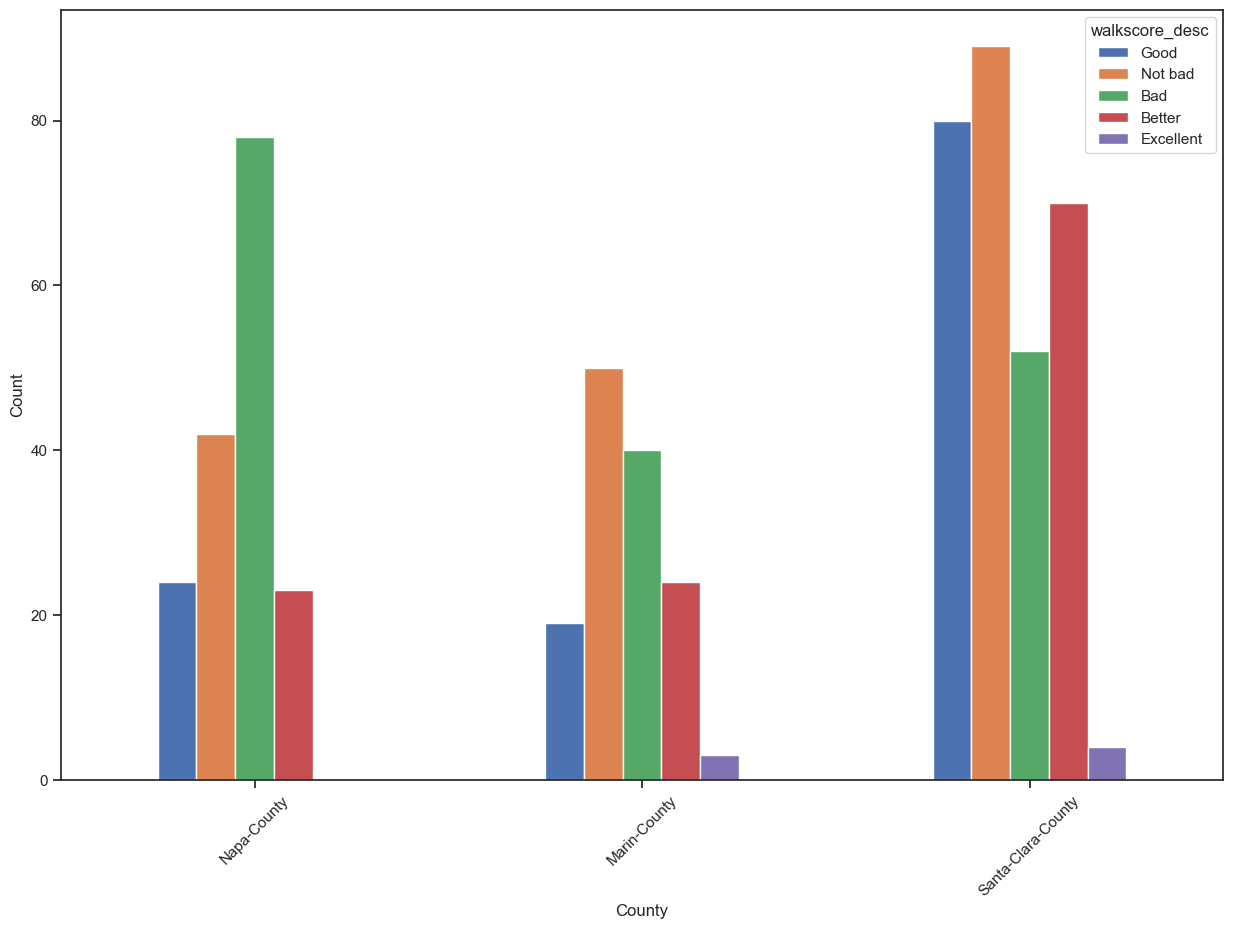

In [37]:
#Categorizing scores into ordinal categories
walkscore_list = []
for t in df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        walkscore_list.append('Bad')
    else:
        walkscore_list.append('')
df['walkscore_desc'] = walkscore_list
g = pd.crosstab(df['County'], df['walkscore_desc'])
County_3 = ['Napa-County','Marin-County','Santa-Clara-County']
unique_ts = list(df['walkscore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Napa-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'Santa-Clara-County')])

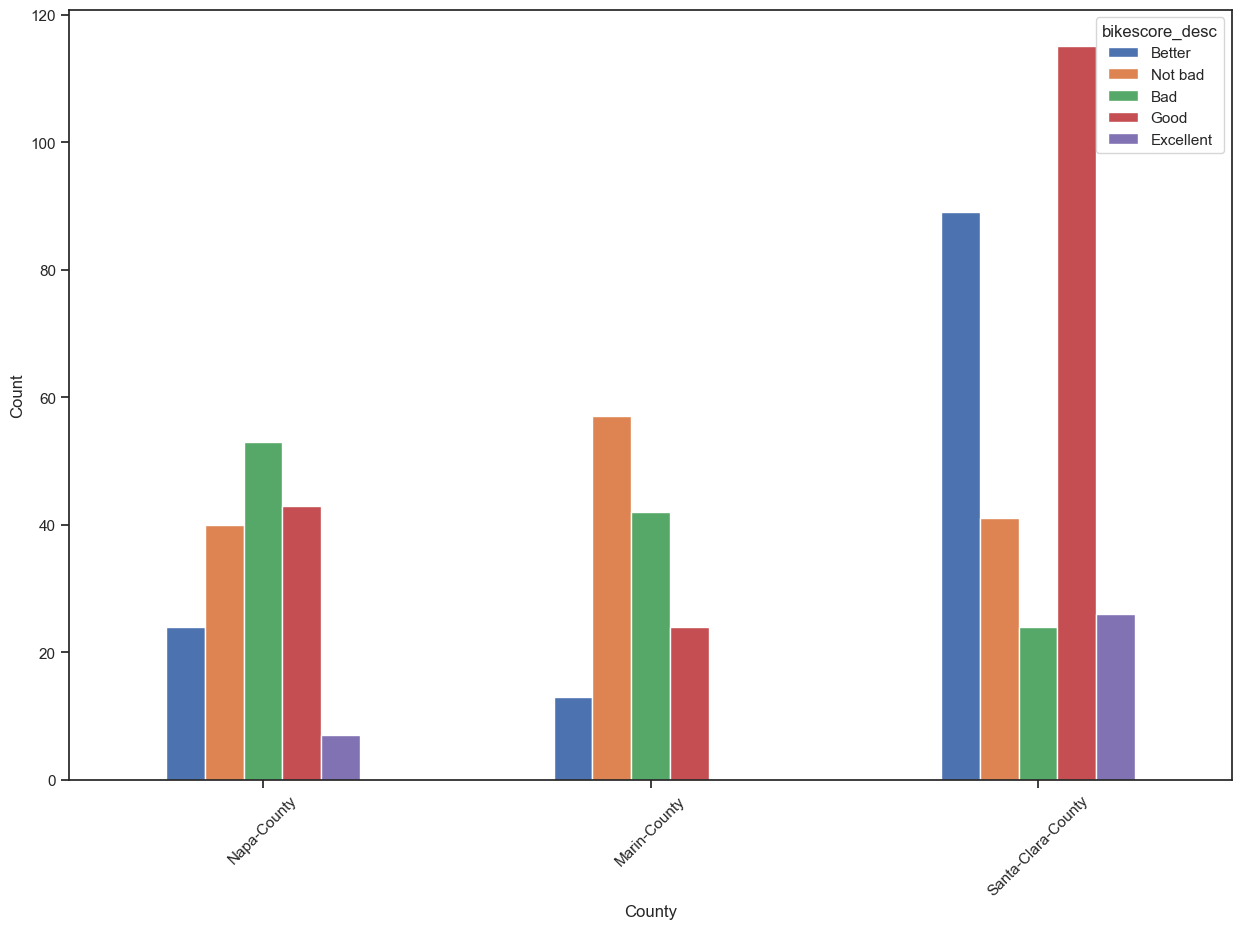

In [38]:
bikescore_list = []
for t in df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        bikescore_list.append('Bad')
    else:
        bikescore_list.append('')
df['bikescore_desc'] = bikescore_list
g = pd.crosstab(df['County'], df['bikescore_desc'])
County_3 = ['Napa-County','Marin-County','Santa-Clara-County']
unique_ts = list(df['bikescore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation b/w Price and WalkScores')

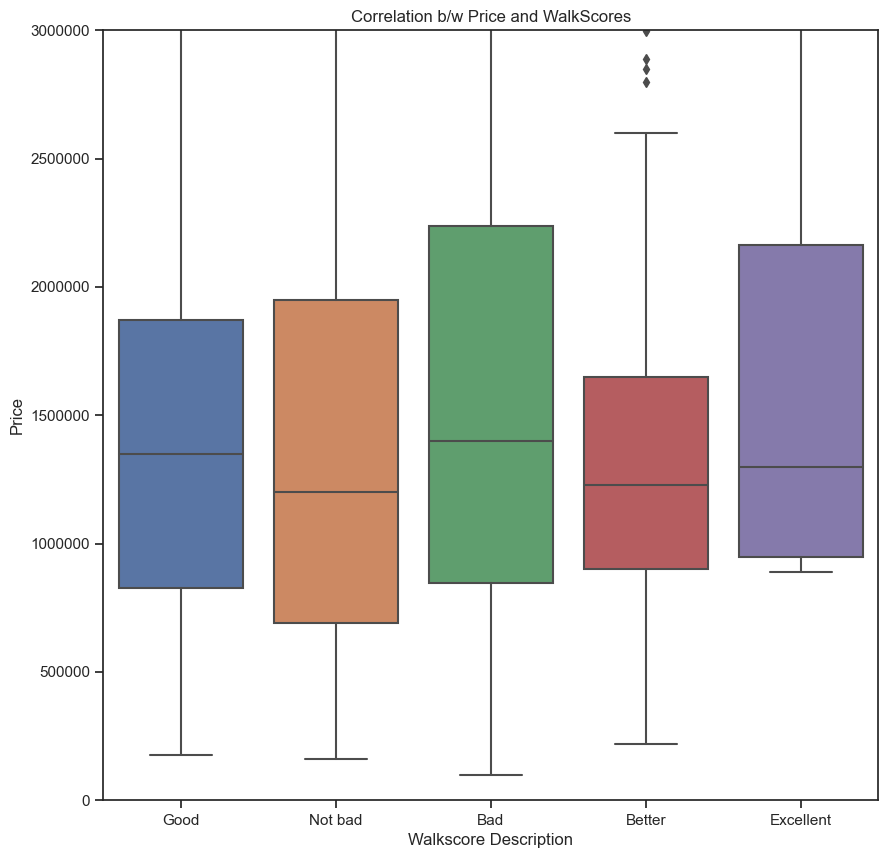

In [39]:
# Price range based on the walkscore and bikescore (averaged for each county)
plot.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Walkscore Description")
plot.title("Correlation b/w Price and WalkScores")

Text(0.5, 1.0, 'Correlation b/w Price and BikeScores')

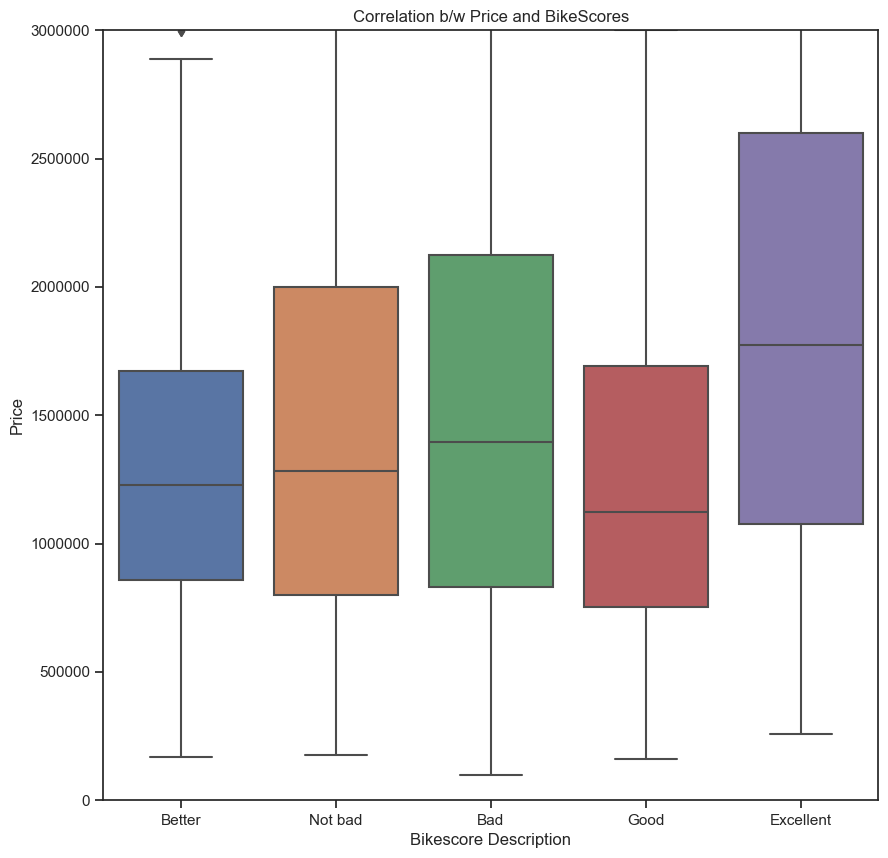

In [40]:
plot.figure(figsize=(10,10))
sns.boxplot(x="bikescore_desc", y="Price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Bikescore Description")
plot.title("Correlation b/w Price and BikeScores")

<AxesSubplot:xlabel='Bath', ylabel='count'>

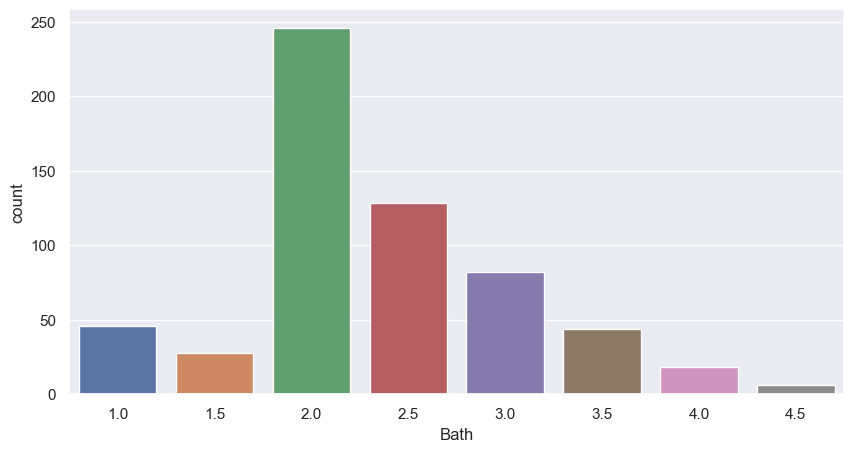

In [41]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='Bath',data=df)

<AxesSubplot:xlabel='Beds', ylabel='count'>

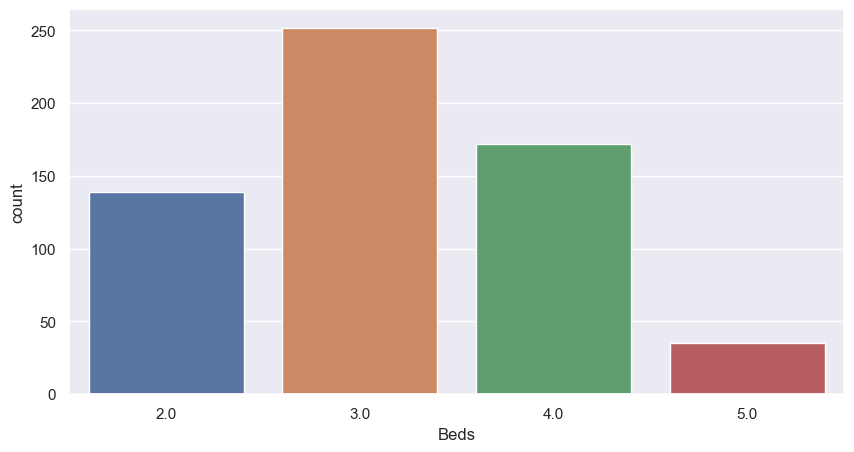

In [42]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='Beds',data=df)

In [43]:
!pip install dmba
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


no display found. Using non-interactive Agg backend


In [44]:
predictors = [ 'WalkScore','Bike_Score', 'Beds','Bath','Sqft','Year_Built']
outcome = 'Price'

# partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

house_lm = LinearRegression()
house_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))

# print performance measures
regressionSummary(train_y, house_lm.predict(train_X))

intercept  16627828.931464829
    Predictor    coefficient
0   WalkScore    -117.172787
1  Bike_Score    4239.376612
2        Beds   33326.022571
3        Bath  158293.826136
4        Sqft     784.605283
5  Year_Built   -8771.269874

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 643918.3634
            Mean Absolute Error (MAE) : 476585.2725
          Mean Percentage Error (MPE) : -30.9496
Mean Absolute Percentage Error (MAPE) : 52.4219


In [45]:
pred_y = house_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, house_lm))
print('AIC : ', AIC_score(train_y, pred_y, house_lm))
print('BIC : ', BIC_score(train_y, pred_y, house_lm))

adjusted r2 :  0.49080749717876515
AIC :  10608.694288029175
BIC :  10639.738551920382


In [46]:
# Use predict() to make predictions on a new set
house_lm_pred = house_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - house_lm_pred})
print('Mean Abolsute Error is ', result.Residual.abs().mean())
print(result.head(20))

# Computing common accuracy measures
regressionSummary(valid_y, house_lm_pred)

Mean Abolsute Error is  472394.34179119364
        Predicted     Actual      Residual
442  2.064827e+06  1988888.0 -7.593896e+04
286  1.389995e+06  2300000.0  9.100051e+05
379  1.711096e+06  1299000.0 -4.120961e+05
522  1.729840e+06  1375000.0 -3.548398e+05
200  1.207070e+06   949000.0 -2.580703e+05
23   7.342582e+05   725000.0 -9.258152e+03
414  1.995808e+06  3488000.0  1.492192e+06
241  1.755981e+06  2275000.0  5.190185e+05
66   5.650836e+05   895000.0  3.299164e+05
165  1.090304e+06   439000.0 -6.513043e+05
293  8.422090e+05   169000.0 -6.732090e+05
245  1.752897e+06   775000.0 -9.778973e+05
0    8.900684e+05  1495000.0  6.049316e+05
530  1.085296e+06   799000.0 -2.862957e+05
232  1.569127e+06   845000.0 -7.241268e+05
441  1.660949e+06  1749000.0  8.805059e+04
147  9.448296e+05   595000.0 -3.498296e+05
472  2.573698e+06  1649000.0 -9.246981e+05
450  1.538692e+06  2798000.0  1.259308e+06
488  1.248260e+06  1350000.0  1.017398e+05

Regression statistics

                      Mean Err

In [56]:
house_lm_pred = house_lm.predict(valid_X)
all_residuals = valid_y - house_lm_pred

# Determining the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
#plot the residuals
plt.show()

0.008333333333333333


In [48]:
# running a linear regression of Price on the remaining 7 predictors in the training set

train_df = train_X.join(train_y)


predictors = train_X.columns
formula = 'Price ~ ' + ' + '.join(predictors)
#formula = 'Price ~ ' + ' + '.join(['Q("'+x+'")' if ' ' in x else x for x in predictors])


house_lm = sm.ols(formula=formula, data=train_df).fit()
print(house_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     58.35
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           7.29e-50
Time:                        22:18:48   Log-Likelihood:                -5296.3
No. Observations:                 358   AIC:                         1.061e+04
Df Residuals:                     351   BIC:                         1.063e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.663e+07   3.02e+06      5.508      0.0

In [49]:
lm=LinearRegression()
lm.fit(train_X,train_y) #fitting the model
predictions=lm.predict(valid_X)



cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,y))

                    Coeff
Bath        158293.826136
Beds         33326.022571
Bike_Score    4239.376612
Sqft           784.605283
WalkScore     -117.172787
Year_Built   -8771.269874


R^2 is:  0.4683968164777077


In [55]:
sns.regplot(valid_y,predictions,fit_reg=True) #plotting the model
import matplotlib.pyplot as plt
plt.show()